In [17]:
import numpy as np
from scipy.signal import spectrogram
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import os
from concurrent.futures import ThreadPoolExecutor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


import numpy as np

#detect available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
batch_size = 256
n_steps = 200
features = 64

# # Load tiny training dataset
# tiny_train_dataset = tf.data.experimental.load(
#     'tiny_train_dataset',
#     element_spec=(
#         tf.TensorSpec(shape=(batch_size, n_steps, features), dtype=tf.float64),
#         tf.TensorSpec(shape=(batch_size,), dtype=tf.int64)
#     )
# )

# # Load tiny testing dataset
# tiny_test_dataset = tf.data.experimental.load(
#     'tiny_test_dataset',
#     element_spec=(
#         tf.TensorSpec(shape=(batch_size, n_steps, features), dtype=tf.float64),
#         tf.TensorSpec(shape=(batch_size,), dtype=tf.int64)
#     )
# )

# # Print shapes
# for X, y in tiny_train_dataset.take(1):
#     print("Tiny Training Dataset - X shape:", X.shape)
#     print("Tiny Training Dataset - y shape:", y.shape)

# for X, y in tiny_test_dataset.take(1):
#     print("Tiny Testing Dataset - X shape:", X.shape)
#     print("Tiny Testing Dataset - y shape:", y.shape)


#load train dataset and test dataset

train_dataset = tf.data.experimental.load(
    'train_dataset',
    element_spec=(
        tf.TensorSpec(shape=(batch_size, n_steps, features), dtype=tf.float64),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.int64)
    )
)

test_dataset = tf.data.experimental.load(
    'test_dataset',
    element_spec=(
        tf.TensorSpec(shape=(batch_size, n_steps, features), dtype=tf.float64),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.int64)
    )
)



In [19]:

from models import *

models = [convolutional]
results = {}
for model in models:
    model = model(features,batch_size)
    epochs = 30
    result = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)
    results[model.name] = result



Epoch 1/30
795/796 [============================>.] - ETA: 0s - loss: 1.1523 - accuracy: 0.4864

2023-12-08 19:35:54.753602: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9980809443861933636
2023-12-08 19:35:54.753659: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3412625067175350254


InvalidArgumentError: Graph execution error:

Detected at node IteratorGetNext defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/andre/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/home/andre/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/andre/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/andre/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/andre/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_82122/3199332948.py", line 8, in <module>

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1832, in fit

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2272, in evaluate

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 4079, in run_step

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2042, in test_function

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2024, in step_function

Detected at node IteratorGetNext defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/andre/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/home/andre/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/andre/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/andre/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/andre/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/home/andre/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/andre/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_82122/3199332948.py", line 8, in <module>

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1832, in fit

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2272, in evaluate

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 4079, in run_step

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2042, in test_function

  File "/home/andre/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2024, in step_function

2 root error(s) found.
  (0) INVALID_ARGUMENT:  Incompatible shapes at component 0: expected [256,200,64] but got [18,200,64].
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
  (1) INVALID_ARGUMENT:  Incompatible shapes at component 0: expected [256,200,64] but got [18,200,64].
	 [[{{node IteratorGetNext}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_39699]

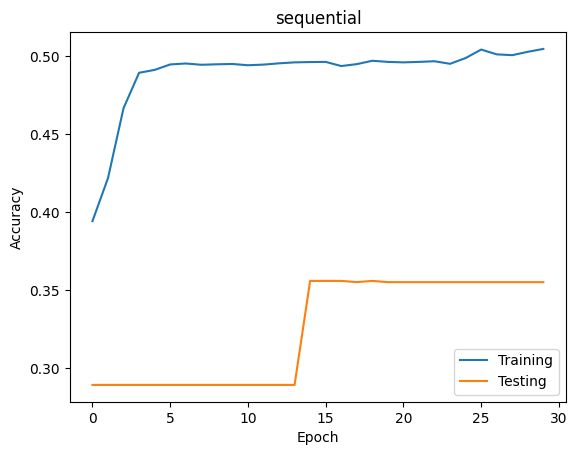

In [ ]:

#display training results for each model

for model_name, result in results.items():
    plt.plot(result.history['accuracy'], label='Training')
    plt.plot(result.history['val_accuracy'], label='Testing')
    plt.title(model_name)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

5/5 [==============================] - 1s 113ms/step


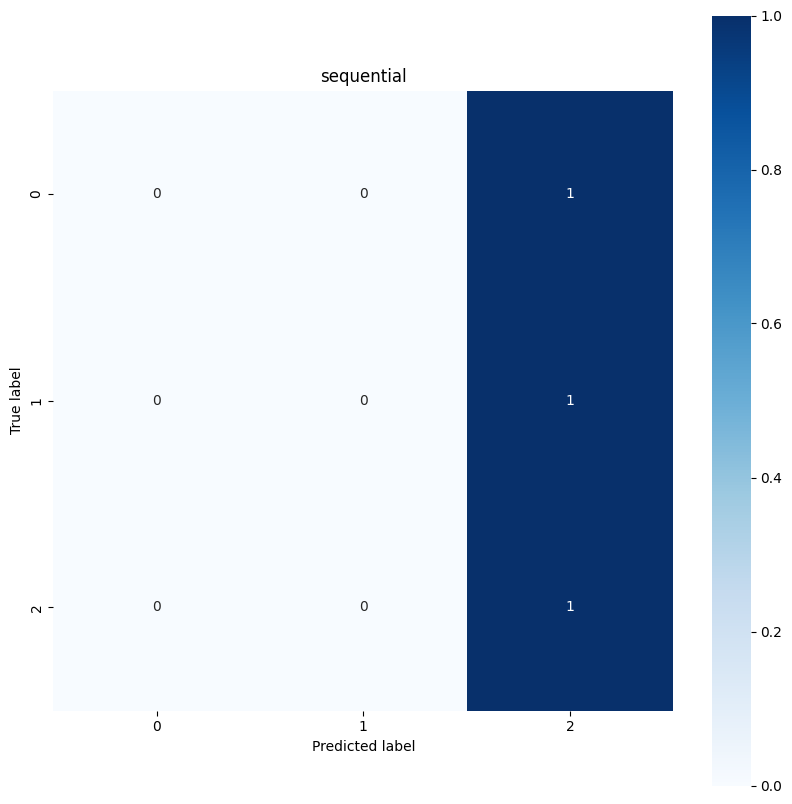

In [ ]:
#confusion matrix for all models, plot all matrices in one single plot

from sklearn.metrics import confusion_matrix
import seaborn as sns

for model_name, result in results.items():
    y_pred = model.predict(tiny_test_dataset)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.concatenate([y for x, y in tiny_test_dataset], axis=0)
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues)
    plt.title(model_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    


FINE TUNING